In [3]:
#conda create --name walmart_sales_analysis python=3.8
#conda activate walmart_sales_analysis
#conda install pandas numpy matplotlib statsmodels scikit-learn jupyter
#pip install schedule

#Ran these in the Python Bash to create new environment names walmart_sales_analysis

In [25]:
import pandas as pd

def extract_data():
    # Replace with your data source
    data = pd.read_csv('C:\\Users\\pimadaba\\Downloads\\feature_engineered_data.csv')
    return data

In [27]:
def transform_data(data):
    # Example transformation: Convert 'Date' column to datetime
    data['Date'] = pd.to_datetime(data['Date'])
    # Add other transformations as needed
    return data

In [33]:
def load_data(data):
    # Save the transformed data to a new CSV file
    data.to_csv('C:\\Users\\pimadaba\\Downloads\\transformed_data.csv', index=False)

In [35]:
def etl():
    data = extract_data()
    data = transform_data(data)
    load_data(data)

if __name__ == "__main__":
    etl()

In [ ]:
#We have created the scheduler.py and ran it in the shell and then kept it running in the background and I started with the model.

In [37]:
# Parameters
input_path = 'C:\\Users\\pimadaba\\Downloads\\feature_engineered_data.csv'
output_path = 'C:\\Users\\pimadaba\\Downloads\\transformed_data.csv'

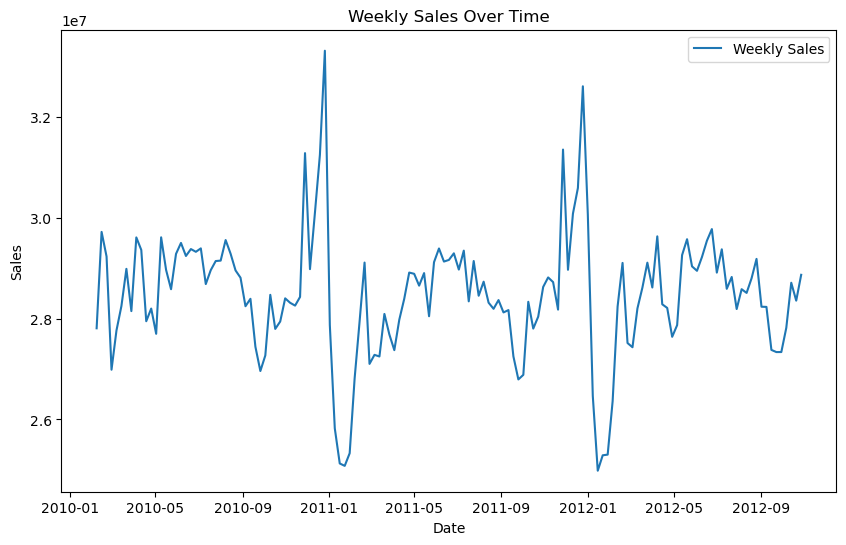

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load transformed data
data = pd.read_csv('C:\\Users\\pimadaba\\Downloads\\transformed_data.csv', parse_dates=['Date'])
data.set_index('Date', inplace=True)

# Aggregate weekly sales
weekly_sales = data['Weekly_Sales'].resample('W').sum()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales, label='Weekly Sales')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

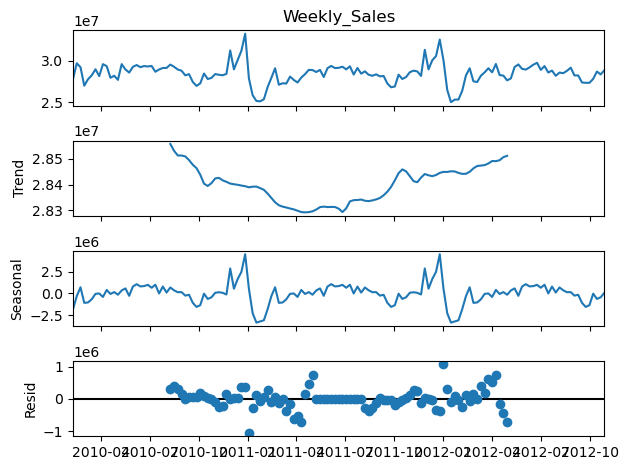

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(weekly_sales, model='additive')
decomposition.plot()
plt.show()

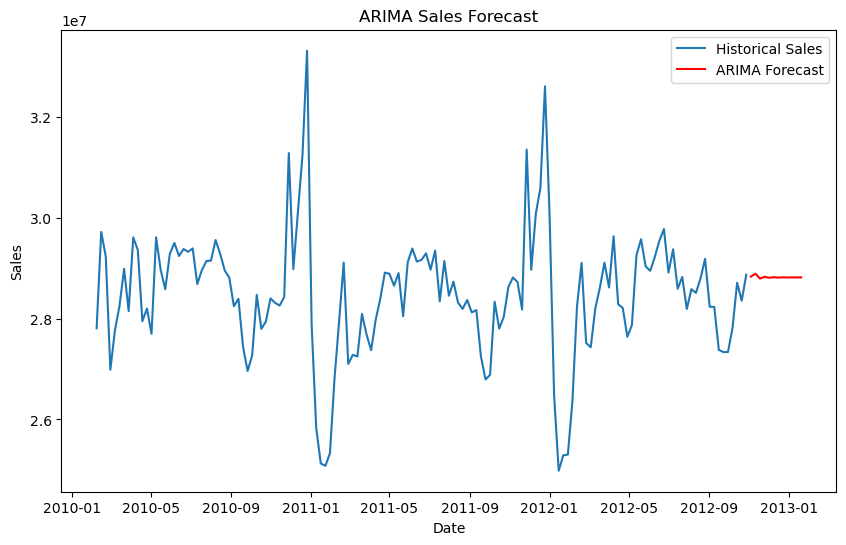

In [41]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
arima_model = ARIMA(weekly_sales, order=(5, 1, 0))
arima_result = arima_model.fit()

# Forecast next 12 weeks
arima_forecast = arima_result.forecast(steps=12)

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales, label='Historical Sales')
plt.plot(arima_forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


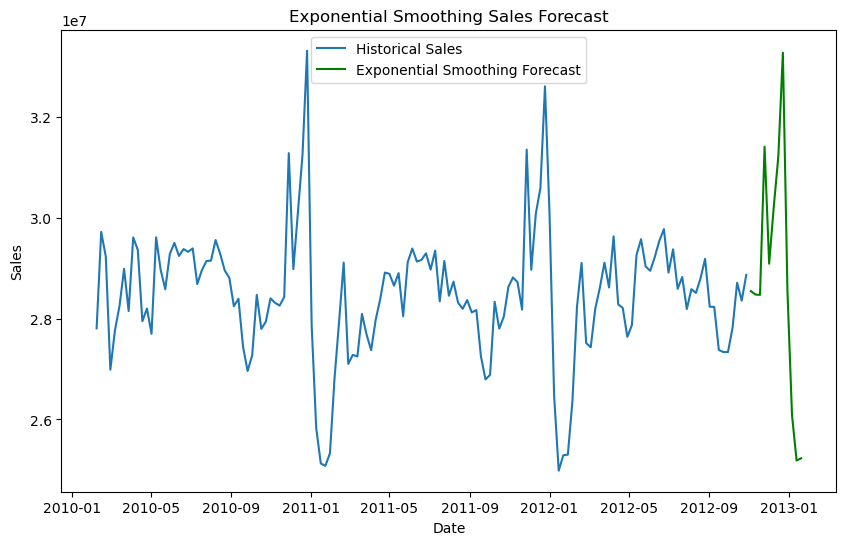

In [101]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Exponential Smoothing model
es_model = ExponentialSmoothing(weekly_sales, trend='add', seasonal='add', seasonal_periods=52)
es_result = es_model.fit()

# Forecast the next 12 weeks
es_forecast = es_result.forecast(steps=12)

# Plot the historical sales and forecast
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales, label='Historical Sales')
plt.plot(es_forecast, label='Exponential Smoothing Forecast', color='green')
plt.title('Exponential Smoothing Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [109]:
# Define campaign period
campaign_start = '2011-10-08'
campaign_end = '2011-10-13'

In [111]:
# Pre-campaign sales
pre_campaign_sales = weekly_sales[:campaign_start]

# During-campaign sales
during_campaign_sales = weekly_sales[campaign_start:campaign_end]

# Post-campaign sales
post_campaign_sales = weekly_sales[campaign_end:]

In [113]:
from scipy.stats import ttest_ind

# Perform t-test
t_stat, p_value = ttest_ind(pre_campaign_sales, during_campaign_sales)

print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: 0.0956691728847347, P-value: 0.9240059010136854
